# Linear models

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ChemAI-Lab/AI4Chem/blob/main/website/modules/01-linear_models.ipynb)

**References:**
1. **Chapters 1 and 3**: Pattern Recognition and Machine Learning, C. M. Bishop.

## Linear Models
The simplest models for regression, are the ones that involved a linear combination of input variables,
$$
f(\mathbf{x},\mathbf{w}) = \underbrace{\mathbf{w}^\top \mathbf{x}}_{\text{dot product}}= \sum_{i}^d w_i \, x_i,
$$
where $\mathbf{w}$ are the linear weights, also known as **parameters**, and $\mathbf{x}$ is the input. $d$ is known as the number of features that represent $\mathbf{x}$. <br>

The family of "linear models" is not unique, it can be extended to **fixed** non-linear functions, 
$$
f(\mathbf{\phi}(\mathbf{x}),\mathbf{w}) = \mathbf{w}^\top \mathbf{\phi}(\mathbf{x})= \sum_{i}^d w_i \, \phi_i(\mathbf{x}),
$$
where $\phi_i(\mathbf{x})$ is a "basis function".



In [107]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as f_mse

import matplotlib.pyplot as plt

In [108]:
# generate random data over f(x) = sin(x) + x - 1
def get_data(N, bool_biased=True):
    # This creates an array x of N linearly spaced values between -1 and 1.
    # bool_biased: if True, adds a bias term (column of ones) to the input data X

    x = np.linspace(-1., 1., N) + np.random.uniform(low=-.15, high=.15, size=N)
    y = 1.2*np.sin(2*x) + x - 1.
    # Adds random noise to each y value.
    y = y + np.random.uniform(low=-.35, high=.35, size=x.shape)
    if bool_biased:
        X = np.column_stack((np.ones_like(x), x))
    else:
        X = x[:, None]
    return X, y

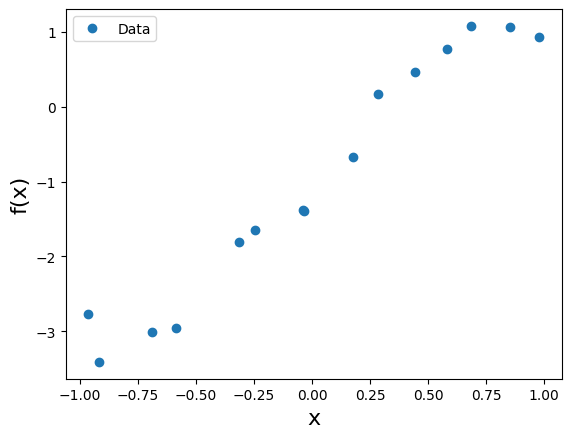

In [116]:
X, y = get_data(15, bool_biased=True)

plt.plot(X[:, 1], y, 'o', label='Data')
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.legend()

## Least Square Problem
**Notes from CHEM-3PC3**: <br> 
* Least Square:  [![Download PDF](https://img.shields.io/badge/Download_PDF-Click_Here-blue.svg)](https://github.com/ChemAI-Lab/Math4Chem/raw/main/website/Lecture_Notes/Notes/Linear_Regression.pdf)  <br>

**Mean Square Error**
$$
{\cal L}(\mathbf{w}) = \frac{1}{2n}\sum_{i}^{n} (\hat{y}_i - \mathbf{w}^\top\phi(\mathbf{x}_i))^2 = \frac{1}{2n} \left (\mathbf{y} - \Phi(\mathbf{X})\mathbf{w} \right)^\top \left (\mathbf{y} - \Phi(\mathbf{X})\mathbf{w} \right)
$$

**Gradient of a function equal to zero**  
$$
    \nabla {\cal L}(\mathbf{w}) \Big\rvert_{\mathbf{w}^{*}} = \frac{1}{2n} \nabla_{\mathbf{w}} \left [ \left (\mathbf{y} - \Phi(\mathbf{X})\mathbf{w} \right)^\top \left (\mathbf{y} - \Phi(\mathbf{X})\mathbf{w} \right) \right ]= 0
$$

To solve for $\mathbf{w}^*$, let's expand $ \left (\mathbf{y} - \Phi(\mathbf{X})\mathbf{w} \right)^\top \left (\mathbf{y} - \Phi(\mathbf{X})\mathbf{w} \right)$,

$$
    \left (\mathbf{y} - \Phi(\mathbf{X})\mathbf{w} \right)^\top \left (\mathbf{y} - \Phi(\mathbf{X})\mathbf{w} \right) = \mathbf{y}^\top \mathbf{y}  - \mathbf{y}^\top \Phi(\mathbf{X})\mathbf{w} -  \mathbf{w}^\top\Phi(\mathbf{X})^\top\mathbf{y} +   \mathbf{w}^\top\Phi(\mathbf{X})^\top \Phi(\mathbf{X})\mathbf{w}
$$
$$
    \nabla_{\mathbf{w}} {\cal L}(\mathbf{w}) = \frac{1}{2n}\left(  -2 \Phi(\mathbf{X})^\top\mathbf{y} + 2\Phi(\mathbf{X})^\top\Phi(\mathbf{X})\mathbf{w} \right) = 0
$$

**Optimal parameters**

$$
 \mathbf{w}^* = \left ( \Phi(\mathbf{X})^\top \Phi(\mathbf{X}) \right ) ^{-1} \Phi(\mathbf{X})^\top \mathbf{y}
$$

$\,$<br>

 
**Extra:**
1. Proof the above equations.
2. [Equations from Sections 2.4.1 and 2.4.2](https://www2.imm.dtu.dk/pubdb/edoc/imm3274.pdf)

In [117]:
# trining a linear model
def linear_model_solver(X, y):
    Xt = X.T  # transpose of X
    A = Xt @ X  # A = X^T X
    z = Xt @ y  # z = X^T y
    A_inv = np.linalg.inv(A)  # inverse of A
    w_opt = A_inv @ z  # w = A^-1 z
    return w_opt  # optimal parameters

In [118]:
# find the optimal parameters
w_opt = linear_model_solver(X, y)
print("Optimal parameters")
for i,wi in enumerate(w_opt):
    print(f"w_{i} = {wi:.3f}, ", end='')
print( )

y_data_pred = X@w_opt
r2_value = r2_score(y,y_data_pred)
print(f'R-squared score: {r2_value:.3f}')

Optimal parameters
w_0 = -1.002, w_1 = 2.528, 
R-squared score: 0.952


Grid with bias:  (100, 2)


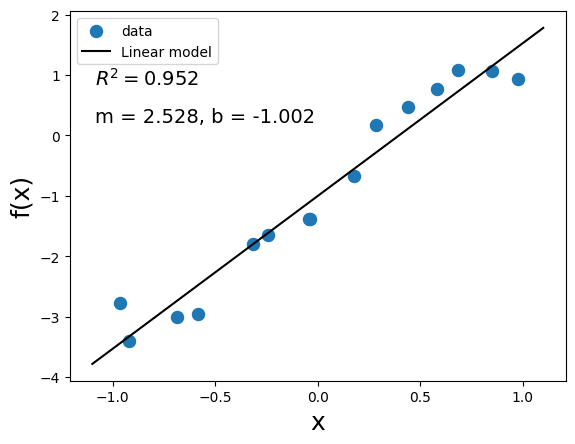

In [125]:
# plot our model
x_grid = np.linspace(-1.1, 1.1, 100)
X_grid = np.column_stack((np.ones_like(x_grid), x_grid))  # add bias term
print("Grid with bias: ", X_grid.shape)
y_pred = X_grid@w_opt

# plot the data
fig, ax = plt.subplots()
ax.text(0.05, 0.8, r'$R^2 = $' +
        f'{r2_value:0.3f}', transform=ax.transAxes, fontsize=14)
ax.text(0.05, 0.7, f"m = {w_opt[1]:0.3f}, b = {w_opt[0]:0.3f}", transform=ax.transAxes, fontsize=14)
ax.scatter(X[:, 1], y, label='data', s=75)
ax.plot(X_grid[:, 1], y_pred, c='k', label='Linear model', markersize=5)
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('f(x)', fontsize=18)
plt.legend()

## Beyond Linear Models
Instead of considering for each data point, $\mathbf{x}^\top = [1, x]$, we can assume any other representation using a "basis set" $\phi$, for example, a polynomial one, 
This is simply a new representation of $x$
$$
\phi(\mathbf{x})^\top = [1, x, x^2, x^3, \cdots,x^p].
$$

Instead of coding how to create the polynomial representation, we will use Sklearn. <br>
Read the documentation: [`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

In [126]:
def polynomial_features(X, p):
    # transform the input data to polynomial features up to degree p
    poly = PolynomialFeatures(p)
    Phi = poly.fit_transform(X)
    return Phi

x [-0.96405551]
phi(x):  [ 1.         -0.96405551  0.92940302 -0.8959961 ]
Optimal parameters
w_0 = -1.029, w_1 = 3.659, w_2 = 0.013, w_3 = -1.668, 
R2 polynomial model: 0.984


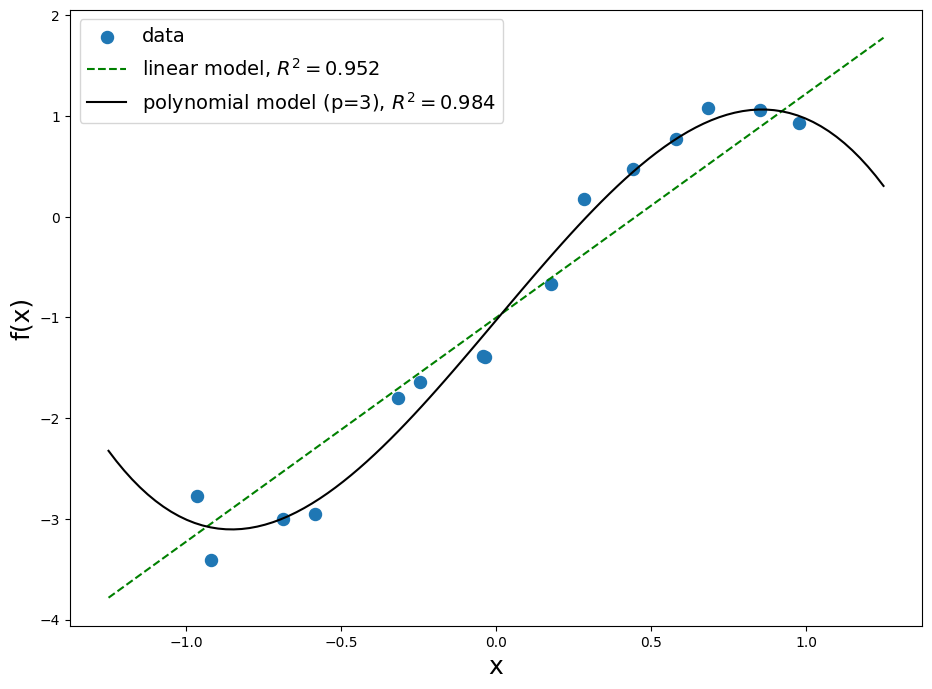

In [129]:
# transform the training data to polynomial features
p = 3  # degree

X = X[:, -1:]  # select the last column only (without bias term)

# transform the input data to polynomial features
X_phi = polynomial_features(X, p)
print("x", X[0])
print("phi(x): ", X_phi[0])

# find the optimal parameters for the polynomial model
w_phi_opt = linear_model_solver(X_phi, y)
print("Optimal parameters")
for i, wi in enumerate(w_phi_opt):
    print(f"w_{i} = {wi:.3f}, ", end='')
print()

y_data_phi_pred = X_phi@w_phi_opt
r2_score_poly = r2_score(y, y_data_phi_pred)
print(f'R2 polynomial model: {r2_score_poly:.3f}')

X_grid = np.linspace(-1.25, 1.25, 100)[:, None]
X_grid_phi = polynomial_features(X_grid, p)
y_pred_phi = X_grid_phi@w_phi_opt

# plot the data and the polynomial model
fig, ax = plt.subplots(figsize=(11, 8))
ax.scatter(X[:, 0], y, label='data', s=75)
ax.plot(X_grid[:, 0], y_pred, c='green', ls='--',
        label='linear model, ' + r'$R^2 = $' +
        f'{r2_value:0.3f}', markersize=5)
ax.plot(X_grid[:, 0], y_pred_phi, c='k',
        label=f'polynomial model (p={p}), '+ r'$R^2 = $' + f'{r2_score_poly:0.3f}', markersize=5)
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('f(x)', fontsize=18)
plt.legend(fontsize=14)

p: 1, R2= 0.9524
p: 3, R2= 0.9838
p: 5, R2= 0.9870
p: 7, R2= 0.9935
p: 9, R2= 0.9942
p: 11, R2= 0.9991
p: 13, R2= 1.0000


<Figure size 640x480 with 0 Axes>

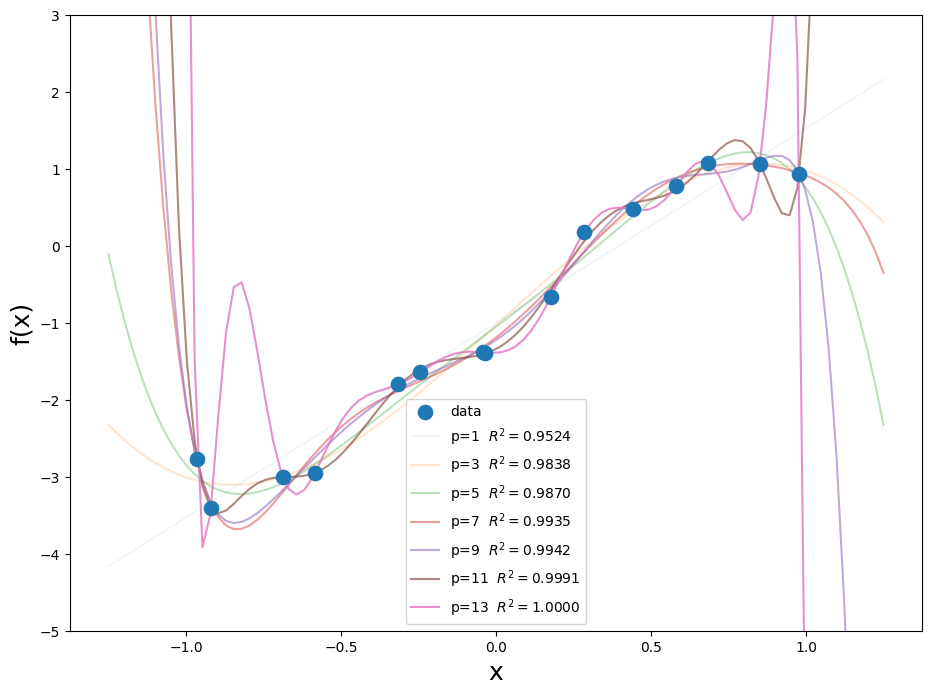

In [130]:
# R2 as a function of the polynomial degree

plt.figure(1)
fig, ax = plt.subplots(figsize=(11, 8))
ax.scatter(X[:, 0], y, label='data', s=105,zorder=4)

r2_ = []    
for p in range(1,15,2):# loop over polynomial degrees p = [2, 4, .., 10]
    X_phi = polynomial_features(X, p)
    w_phi_opt = linear_model_solver(X_phi, y) # we can reuse our function
    # print(f'Optimal parameters\n{w_phi_opt}')

    y_data_phi_pred = X_phi@w_phi_opt
    r2_score_poly = r2_score(y, y_data_phi_pred)
    r2_.append(r2_score_poly)
    print(f'p: {p}, R2= {r2_score_poly:.4f}')

    X_grid_phi = polynomial_features(X_grid, p)
    y_pred_phi = X_grid_phi@w_phi_opt
# plot the data and the polynomial model

    ax.plot(X_grid[:, 0], y_pred_phi,
            label=f'p={p} ' +  r' $R^2 = $' +
            f'{r2_score_poly:0.4f}',  markersize=5, alpha=0.95*p/15)
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('f(x)', fontsize=18)
ax.set_ylim(-5,3)
plt.legend(fontsize=10,loc=0)


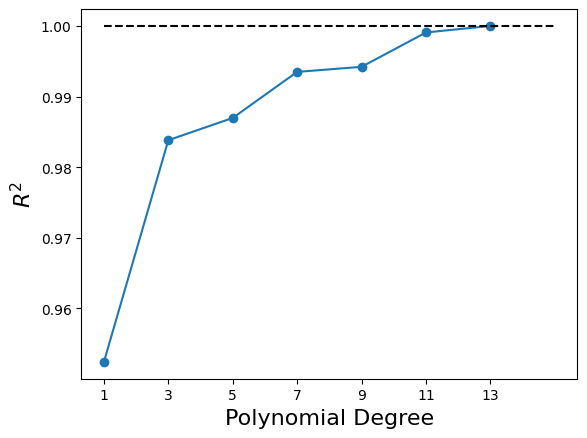

In [131]:
plt.figure(2)
plt.plot(range(1, 15, 2), r2_, '-o')
plt.hlines(y=1.0, xmin=1, xmax=15, colors='k', linestyles='dashed')
plt.xticks(range(1, 15, 2))
plt.xlabel('Polynomial Degree', fontsize=16)
plt.ylabel(r'$R^2$', fontsize=16)
plt.show()

## Model selection

From the exercise above, we can see that increasing the polynomial degree often improves the fit.
However, if you look closely, the models start to look "funky" and oscillate between data points,
especially when $p > 8$. This "fake high accuracy" is known as **overfilling**.
<br>

The degree of a polynomial is a **hyperparameter**: a choice we control that strongly affects
model accuracy. To pick an "optimal" value, we cannot evaluate on the same data used for training;
we need additional, unseen data to assess true performance.


In [136]:
# split data into training and validation sets
X, y = get_data(35, bool_biased=False)
X_tr,X_val, y_tr,y_val = train_test_split(X,y,test_size=0.25, random_state=0)
print("Training data:", X_tr.shape, y_tr.shape)
print("Validation data:", X_val.shape, y_val.shape)

Training data: (26, 1) (26,)
Validation data: (9, 1) (9,)


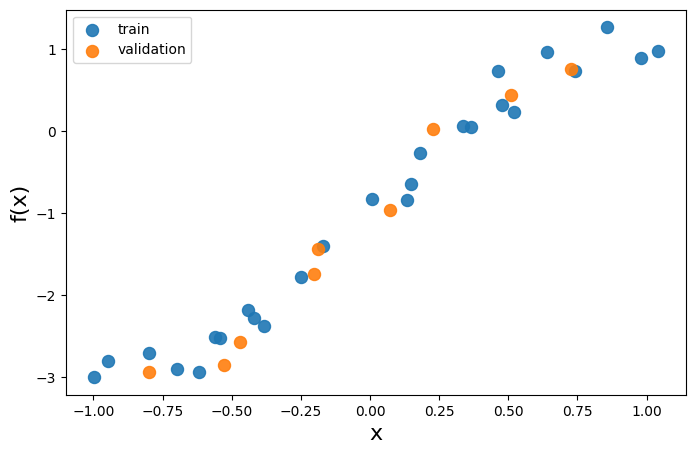

In [138]:
# visualize the train/validation split
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(X_tr, y_tr, c='tab:blue', label='train', s=75, alpha=0.9)
ax.scatter(X_val, y_val, c='tab:orange', label='validation', s=75, alpha=0.9)
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('f(x)', fontsize=16)
ax.legend()


In [140]:
p_ = np.arange(1,15,2) # polynomial degrees
r2_train = [] # list to store R2 scores for training set
r2_val = [] # list to store R2 scores for validation set
for p in p_:
    # transform the training data to polynomial features
    X_tr_phi = polynomial_features(X_tr, p)
    w_phi_opt = linear_model_solver(X_tr_phi, y_tr)

    # evaluate on training data
    y_tr_phi_pred = X_tr_phi@w_phi_opt
    r2_score_tr = r2_score(y_tr, y_tr_phi_pred)
    r2_train.append(r2_score_tr)
    mse_tr = f_mse(y_tr, y_tr_phi_pred)
    rmse_tr = np.sqrt(mse_tr)

    # transform the validation data to polynomial features
    X_val_phi = polynomial_features(X_val, p)
    y_val_phi_pred = X_val_phi@w_phi_opt
    r2_score_val = r2_score(y_val, y_val_phi_pred)
    r2_val.append(r2_score_val)
    mse_val = f_mse(y_val, y_val_phi_pred)
    rmse_val = np.sqrt(mse_val)

    print(f'p: {p}, R2 train= {r2_score_tr:.4f}, R2 val= {r2_score_val:.4f}', end=', ')
    print(f' RMSE train= {rmse_tr:.4f}, RMSE val= {rmse_val:.4f}')

p: 1, R2 train= 0.9570, R2 val= 0.9435,  RMSE train= 0.3055, RMSE val= 0.3170
p: 3, R2 train= 0.9870, R2 val= 0.9796,  RMSE train= 0.1681, RMSE val= 0.1907
p: 5, R2 train= 0.9870, R2 val= 0.9786,  RMSE train= 0.1677, RMSE val= 0.1953
p: 7, R2 train= 0.9882, R2 val= 0.9778,  RMSE train= 0.1601, RMSE val= 0.1986
p: 9, R2 train= 0.9885, R2 val= 0.9790,  RMSE train= 0.1581, RMSE val= 0.1933
p: 11, R2 train= 0.9890, R2 val= 0.9808,  RMSE train= 0.1543, RMSE val= 0.1849
p: 13, R2 train= 0.9904, R2 val= 0.9703,  RMSE train= 0.1440, RMSE val= 0.2298


[0.95698132 0.98697428 0.98704015 0.98818683 0.98848459 0.98902452
 0.9904394 ]


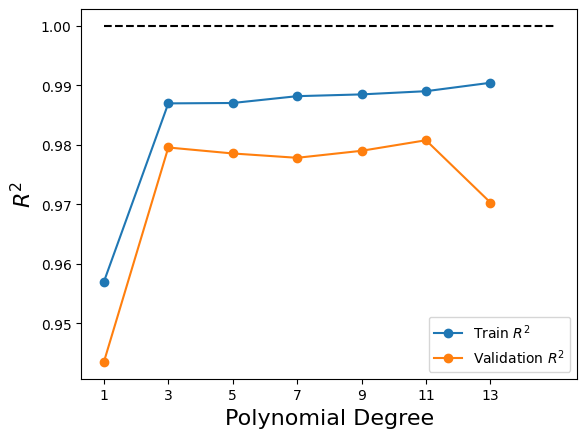

In [141]:
r2_train = np.array(r2_train)
r2_val = np.array(r2_val)
print(r2_train)
plt.figure(3)
plt.plot(p_, r2_train, '-o', label='Train ' + r'$R^2$')
plt.plot(p_, r2_val, '-o', label='Validation ' + r'$R^2$')
plt.hlines(y=1.0, xmin=1, xmax=15, colors='k', linestyles='dashed')
plt.xticks(p_)
plt.xlabel('Polynomial Degree', fontsize=16)
plt.ylabel(r'$R^2$', fontsize=16)
plt.legend(loc=4)

## Overfitting

Overfitting happens when a model learns noise in the training data instead of the underlying pattern.
It can look very accurate on the training set but generalizes poorly to new, unseen data.


# Ridge Regression to avoid Overfitting

When we solve the least square problem, the linear weights can have high values, this is the reason behind the highly osculating functions that fit the data. 

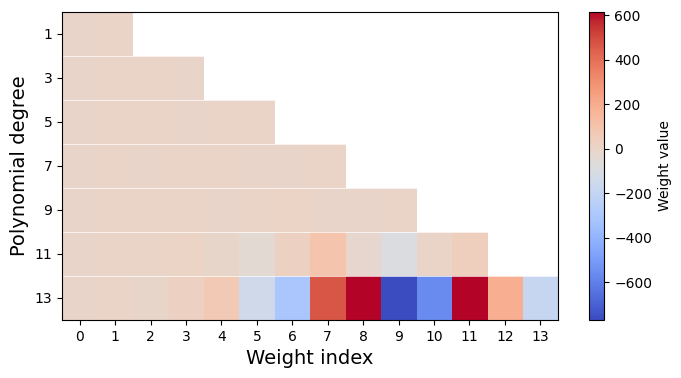

In [142]:
# grid of polynomial weights across degrees
p_grid = np.arange(1, 15, 2)
w_grid = np.full((len(p_grid), p_grid.max() + 1), np.nan)

for i, p in enumerate(p_grid):
    X_tr_phi = polynomial_features(X_tr, p)
    w_phi_opt = linear_model_solver(X_tr_phi, y_tr)
    w_grid[i, :p + 1] = w_phi_opt

fig, ax = plt.subplots(figsize=(8, 4))
im = ax.imshow(w_grid, aspect='auto', cmap='coolwarm')
ax.hlines(np.arange(-0.5, len(p_grid), 1), -0.5, p_grid.max() + 0.5, colors='white', linewidth=0.5)
ax.set_xlabel('Weight index', fontsize=14)
ax.set_ylabel('Polynomial degree', fontsize=14)
ax.set_xticks(np.arange(p_grid.max() + 1))
ax.set_yticks(np.arange(len(p_grid)))
ax.set_yticklabels(p_grid)
fig.colorbar(im, ax=ax, label='Weight value')


add Ridge regression text here

# Ridge Regression to avoid Overfitting

Ridge regression adds an $L_2$ penalty to the least-squares objective.

$$

\hat{w} = \arg\min_w \|\mathbf{y} - \Phi(\mathbf{X})\mathbf{w} \|_2^2 + \lambda \|\mathbf{w}\|_2^2 = \arg\min_w \frac{1}{2n}\sum_{i}^{n} (\hat{y}_i - \mathbf{w}^\top\phi(\mathbf{x}_i))^2 + \lambda \sum_j^d w_j^2

$$

This yields the closed-form solution

$$
\hat{w} = (\Phi(\mathbf{X})^T \Phi(\mathbf{X}) + \lambda I)^{-1} \Phi(\mathbf{X})^T \mathbf{y}.
$$

You can derive this equation using the same procedure as in least square without the ridge term $ \lambda \|\mathbf{w}\|_2^2$.<br>


The $\lambda$ parameter is also a **hyperparameter**.


In [143]:
def ridge_regression_solver(X, y, lambda_):
    # Ridge regression solver
    Xt = X.T
    n_features = X.shape[1]
    A = Xt @ X + lambda_ * np.eye(n_features)  # A = X^T X + λI
    z = Xt @ y  # z = X^T y
    A_inv = np.linalg.inv(A)  # inverse of A
    w_ridge_opt = A_inv @ z  # w = A^-1 z
    return w_ridge_opt  # optimal parameters

In [144]:
# scan \lambda for Ridge regression and p = 8
lambda_values = np.logspace(-6, 2, 11)
p = 8  # polynomial degree
r2_ridge_train = []
r2_ridge_val = []
for lambda_ in lambda_values:
    # transform the training data to polynomial features
    X_tr_phi = polynomial_features(X_tr, p)
    w_ridge_opt = ridge_regression_solver(X_tr_phi, y_tr, lambda_)

    # evaluate on training data
    y_tr_phi_pred = X_tr_phi@w_ridge_opt
    r2_score_tr = r2_score(y_tr, y_tr_phi_pred)
    r2_ridge_train.append(r2_score_tr)

    # transform the validation data to polynomial features
    X_val_phi = polynomial_features(X_val, p)
    y_val_phi_pred = X_val_phi@w_ridge_opt
    r2_score_val = r2_score(y_val, y_val_phi_pred)
    r2_ridge_val.append(r2_score_val)

    print(f'λ: {lambda_:.1e}, R2 train= {r2_score_tr:.4f}, R2 val= {r2_score_val:.4f}')

λ: 1.0e-06, R2 train= 0.9884, R2 val= 0.9790
λ: 6.3e-06, R2 train= 0.9884, R2 val= 0.9790
λ: 4.0e-05, R2 train= 0.9884, R2 val= 0.9790
λ: 2.5e-04, R2 train= 0.9883, R2 val= 0.9791
λ: 1.6e-03, R2 train= 0.9880, R2 val= 0.9794
λ: 1.0e-02, R2 train= 0.9876, R2 val= 0.9783
λ: 6.3e-02, R2 train= 0.9862, R2 val= 0.9733
λ: 4.0e-01, R2 train= 0.9781, R2 val= 0.9540
λ: 2.5e+00, R2 train= 0.8983, R2 val= 0.8229
λ: 1.6e+01, R2 train= 0.5917, R2 val= 0.3581
λ: 1.0e+02, R2 train= -0.0334, R2 val= -0.4076


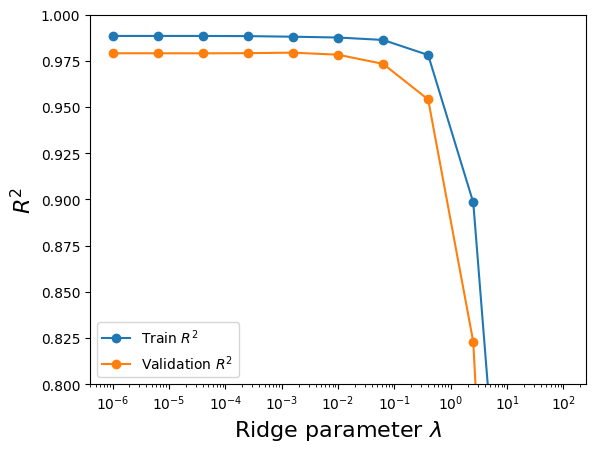

In [145]:
plt.plot(lambda_values, r2_ridge_train, '-o', label='Train ' + r'$R^2$')
plt.plot(lambda_values, r2_ridge_val, '-o', label='Validation ' + r'$R^2$')
plt.ylim(0.8,1.0)
plt.xscale('log')
plt.xlabel(r'Ridge parameter $\lambda$', fontsize=16)
plt.ylabel(r'$R^2$', fontsize=16)
plt.legend(loc=3)


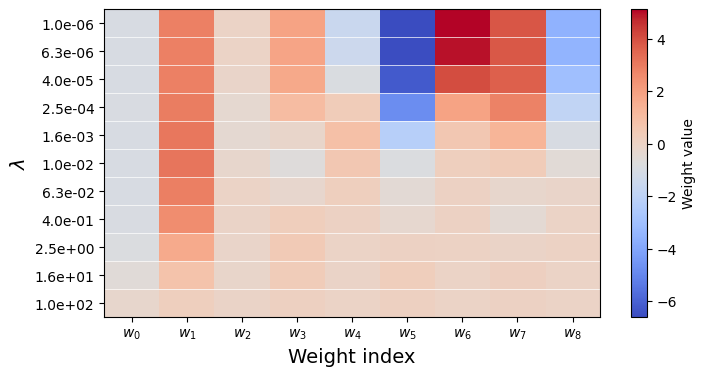

In [146]:
# grid of polynomial weights across ridge lambdas (p=8)
p = 8
X_tr_phi = polynomial_features(X_tr, p)
w_lambda_grid = np.zeros((len(lambda_values), p + 1))

for i, lambda_ in enumerate(lambda_values):
    w_ridge_opt = ridge_regression_solver(X_tr_phi, y_tr, lambda_)
    w_lambda_grid[i, :] = w_ridge_opt

fig, ax = plt.subplots(figsize=(8, 4))
im = ax.imshow(w_lambda_grid, aspect='auto', cmap='coolwarm')
ax.hlines(np.arange(-0.5, len(lambda_values), 1), -0.5, p + 0.5, colors='white', linewidth=0.5)
ax.set_xlabel('Weight index', fontsize=14)
ax.set_ylabel(r'$\lambda$', fontsize=14)
ax.set_xticks(np.arange(p + 1), [r'$w_{%s}$'%(i) for i in range(p + 1)])
ax.set_yticks(np.arange(len(lambda_values)))
ax.set_yticklabels([f'{v:.1e}' for v in lambda_values])
fig.colorbar(im, ax=ax, label='Weight value')


In [ ]:
# interactive ridge fit for a single lambda (p=8)

import ipywidgets as widgets
from IPython.display import display

p = 8
X_tr_phi = polynomial_features(X_tr, p)
x_grid = np.linspace(X_tr.min(), X_tr.max(), 200)[:, None]
X_grid_phi = polynomial_features(x_grid, p)


def plot_ridge(lambda_):
    w_ridge_opt = ridge_regression_solver(X_tr_phi, y_tr, lambda_)
    y_pred = X_grid_phi @ w_ridge_opt
    
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.scatter(X_tr, y_tr, s=40, alpha=0.5, label='train data')
    ax.scatter(X_val, y_val, s=40, alpha=0.5, label='validation data', c='orange')
    ax.plot(x_grid[:, 0], y_pred, c='k', label=f'λ={lambda_:.3e}')
    ax.set_xlabel('x', fontsize=16)
    ax.set_ylabel('f(x)', fontsize=16)
    ax.legend()
    plt.show()

slider = widgets.FloatLogSlider(value=1e-2, base=10, min=-6, max=2, step=0.2, description='lambda')
widgets.interact(plot_ridge, lambda_=slider)



interactive(children=(FloatLogSlider(value=0.01, description='lambda', max=2.0, min=-6.0, step=0.2), Output())…

<function __main__.plot_ridge(lambda_)>

## Cross Validation

A single random split can give a misleading performance estimate because results depend on which points land in the train/validation sets.
Cross-validation repeats the split across multiple folds and averages the scores, giving a more reliable estimate for model selection.


![Cross-validation schematic](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

Reference:
[Cross-Validation Scikit Learn](https://scikit-learn.org/stable/modules/cross_validation.html)

In [148]:
# Cross-validation with scikit-learn to select degree and lambda
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, KFold

# X and y come from the earlier train/val split setup
X_all = X.reshape(-1, 1)
y_all = y

model = make_pipeline(
    PolynomialFeatures(include_bias=True),
    Ridge()
)

# Grid of polynomial degrees and lambdas (alpha in scikit-learn) to search
param_grid = {
    "polynomialfeatures__degree": [1, 2, 3, 4, 6, 8, 10, 12],
    "ridge__alpha": np.logspace(-3, 2, 25), #lambda in ridge regression
}
cv = KFold(n_splits=5, shuffle=True, random_state=42)

search = GridSearchCV(
    model,
    param_grid=param_grid,
    cv=cv,
    scoring="neg_mean_squared_error"
)
search.fit(X_all, y_all)

best_degree = search.best_params_["polynomialfeatures__degree"]
best_lambda = search.best_params_["ridge__alpha"]
best_mse = -search.best_score_

print(f"Best degree: {best_degree}")
print(f"Best lambda: {best_lambda:.3e}")
print(f"CV MSE at best: {best_mse:.4f}")

best_model = search.best_estimator_
ridge = best_model.named_steps["ridge"]
w = ridge.coef_
b = ridge.intercept_

print("coef:", w[1:])
print("intercept:", b)


Best degree: 3
Best lambda: 1.778e-02
CV MSE at best: 0.0382
coef: [ 3.29243963  0.05590363 -1.3485957 ]
intercept: -1.021416762213962


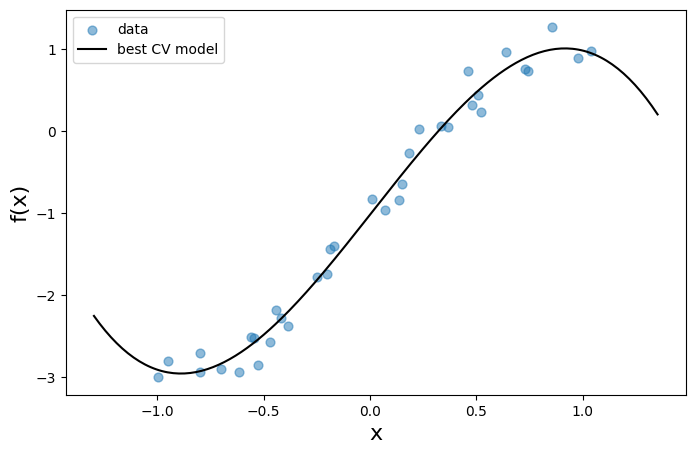

In [150]:
# Plot predictions from the best cross-validated model
best_model = search.best_estimator_
x_grid = np.linspace(X_all.min()*1.3, X_all.max()*1.3, 200)[:, None]
y_pred = best_model.predict(x_grid)


fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(X_all, y_all, s=40, alpha=0.5, label="data")
ax.plot(x_grid[:, 0], y_pred, c="k", label="best CV model")
ax.set_xlabel("x", fontsize=16)
ax.set_ylabel("f(x)", fontsize=16)
ax.legend()
plt.show()


### Model Diagnostics
Quick checks to see if residuals look random and centered around zero.


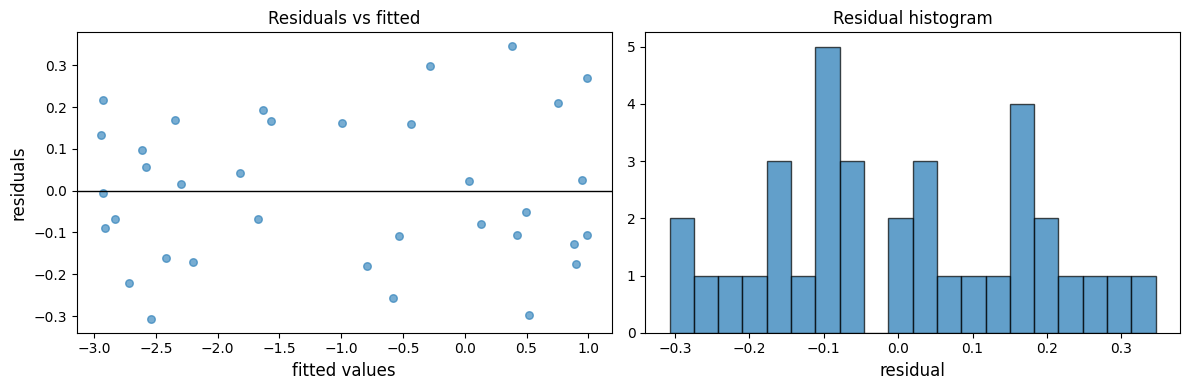

In [151]:
# Residual diagnostics for the best CV model
y_fit = best_model.predict(X_all)
residuals = y_all - y_fit

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].scatter(y_fit, residuals, s=30, alpha=0.6)
axes[0].axhline(0, color="k", linewidth=1)
axes[0].set_xlabel("fitted values", fontsize=12)
axes[0].set_ylabel("residuals", fontsize=12)
axes[0].set_title("Residuals vs fitted", fontsize=12)

axes[1].hist(residuals, bins=20, alpha=0.7, edgecolor="k")
axes[1].set_xlabel("residual", fontsize=12)
axes[1].set_title("Residual histogram", fontsize=12)

plt.tight_layout()
plt.show()


## Bias–Variance Tradeoff

As model complexity increases, training error typically decreases, but validation error can rise after a point due to overfitting.
Plotting train vs. cross-validated error across polynomial degrees makes this tradeoff visible.


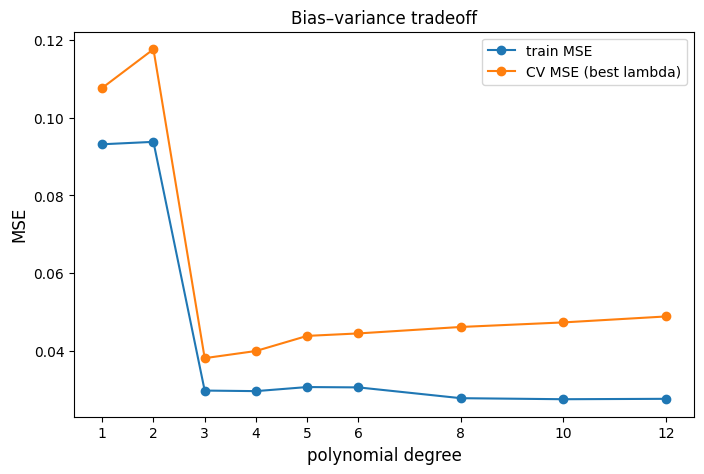

Best lambda per degree:
degree 1: lambda=1.00e-06
degree 2: lambda=2.15e-01
degree 3: lambda=1.00e-02
degree 4: lambda=2.15e-02
degree 5: lambda=4.64e-02
degree 6: lambda=4.64e-02
degree 8: lambda=4.64e-03
degree 10: lambda=1.00e-02
degree 12: lambda=2.15e-02


In [152]:
# Train vs CV error across polynomial degree (selecting best lambda per degree)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

degrees = [1, 2, 3, 4, 5, 6, 8, 10, 12]
lambdas = np.logspace(-6, 2, 25)

train_mse = []
cv_mse = []
best_lambdas = []

for d in degrees:
    # inner loop: pick lambda with lowest CV MSE for this degree
    lambda_scores = []
    for a in lambdas:
        model = make_pipeline(
            PolynomialFeatures(degree=d, include_bias=True),
            Ridge(alpha=a)
        )
        scores = cross_val_score(
            model, X_all, y_all, cv=cv, scoring="neg_mean_squared_error"
        )
        lambda_scores.append(-scores.mean())

    best_idx = int(np.argmin(lambda_scores))
    best_a = lambdas[best_idx]
    best_lambdas.append(best_a)
    cv_mse.append(lambda_scores[best_idx])

    # fit on full data with best lambda to get training MSE
    best_model = make_pipeline(
        PolynomialFeatures(degree=d, include_bias=True),
        Ridge(alpha=best_a)
    )
    best_model.fit(X_all, y_all)
    y_fit = best_model.predict(X_all)
    train_mse.append(mean_squared_error(y_all, y_fit))

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(degrees, train_mse, marker="o", label="train MSE")
ax.plot(degrees, cv_mse, marker="o", label="CV MSE (best lambda)")
ax.set_xlabel("polynomial degree", fontsize=12)
ax.set_ylabel("MSE", fontsize=12)
ax.set_title("Bias–variance tradeoff", fontsize=12)
ax.set_xticks(degrees)
ax.legend()
plt.show()

print("Best lambda per degree:")
for d, a in zip(degrees, best_lambdas):
    print(f"degree {d}: lambda={a:.2e}")


### Extra: Gaussian (RBF) Feature Expansion
We can also expand features using a Gaussian (radial basis) function.


In [ ]:
from sklearn.kernel_approximation import RBFSampler
from scipy.spatial.distance import cdist


def gaussian_features(X, n_gaussians, length_scale=0.2):
    # transform the input data to Gaussian basis functions
    # X: input data (N x D)
    # n_gaussians: number of Gaussian basis functions
    # length_scale: length scale of the Gaussians

    # Use the raw x values (without the bias column)
    x_min, x_max = np.min(X[:, 1]), np.max(X[:, 1])
    x_grid_features = np.linspace(x_min, x_max, n_gaussians)[:, None]

    dists = cdist(X[:, 1:] / length_scale, x_grid_features /
                  length_scale, metric="sqeuclidean")
    Phi = np.exp(-0.5 * dists)
    return Phi